In [65]:
#ignore warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

%matplotlib inline

In [66]:
df= pd.read_csv('ATM_transaction_dataset.csv')

In [67]:
df.head()

,atm_name,transaction_date,No_Of_Withdrawals,no_of_cub_card_withdrawals,no_of_other_card_withdrawals,total_amount_withdrawn,amount_withdrawn_cub_card,amount_withdrawn_other_card,weekday,working_day
0,Big Street ATM,01/01/2011,50,20,30,123800,41700,82100,saturday,H
1,Mount Road ATM,01/01/2011,253,67,186,767900,270900,497000,saturday,H
2,Airport ATM,01/01/2011,98,56,42,503400,347700,155700,saturday,H
3,KK Nagar ATM,01/01/2011,265,159,106,945300,532600,412700,saturday,H
4,Christ College ATM,01/01/2011,74,25,49,287700,148200,139500,saturday,H


In [68]:
df.shape

(11589, 10)

In [69]:
df.size

115890

In [70]:
df.columns

Index(['atm_name', 'transaction_date', 'No_Of_Withdrawals',
       'no_of_cub_card_withdrawals', 'no_of_other_card_withdrawals',
       'total_amount_withdrawn', 'amount_withdrawn_cub_card',
       'amount_withdrawn_other_card', 'weekday', 'working_day'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11589 entries, 0 to 11588
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   atm_name                      11589 non-null  object
 1   transaction_date              11589 non-null  object
 2   No_Of_Withdrawals             11589 non-null  int64 
 3   no_of_cub_card_withdrawals    11589 non-null  int64 
 4   no_of_other_card_withdrawals  11589 non-null  int64 
 5   total_amount_withdrawn        11589 non-null  int64 
 6   amount_withdrawn_cub_card     11589 non-null  int64 
 7   amount_withdrawn_other_card   11589 non-null  int64 
 8   weekday                       11589 non-null  object
 9   working_day                   11589 non-null  object
dtypes: int64(6), object(4)
memory usage: 905.5+ KB


In [72]:
df.describe()

,No_Of_Withdrawals,no_of_cub_card_withdrawals,no_of_other_card_withdrawals,total_amount_withdrawn,amount_withdrawn_cub_card,amount_withdrawn_other_card
count,11589.000000,11589.000000,11589.000000,1.158900e+04,1.158900e+04,1.158900e+04
mean,123.341099,67.567694,55.773406,5.223059e+05,3.345604e+05,1.877455e+05
std,67.315288,47.849517,38.506475,3.248167e+05,2.470771e+05,1.502351e+05
min,1.000000,0.000000,0.000000,1.000000e+02,0.000000e+00,0.000000e+00
25%,79.000000,34.000000,25.000000,3.057000e+05,1.560000e+05,7.910000e+04
50%,115.000000,57.000000,50.000000,4.700000e+05,2.816000e+05,1.586000e+05
75%,158.000000,87.000000,78.000000,6.716000e+05,4.485000e+05,2.560000e+05
max,491.000000,345.000000,310.000000,2.549800e+06,1.907800e+06,1.472600e+06


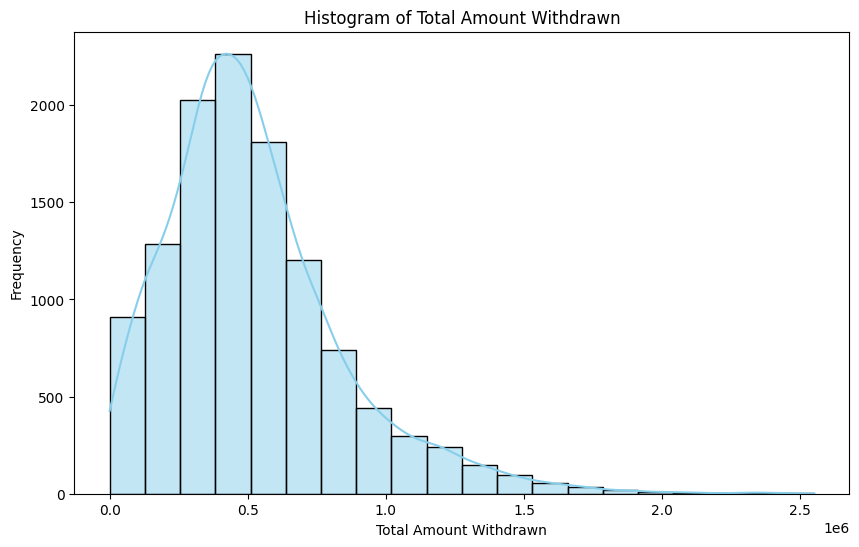

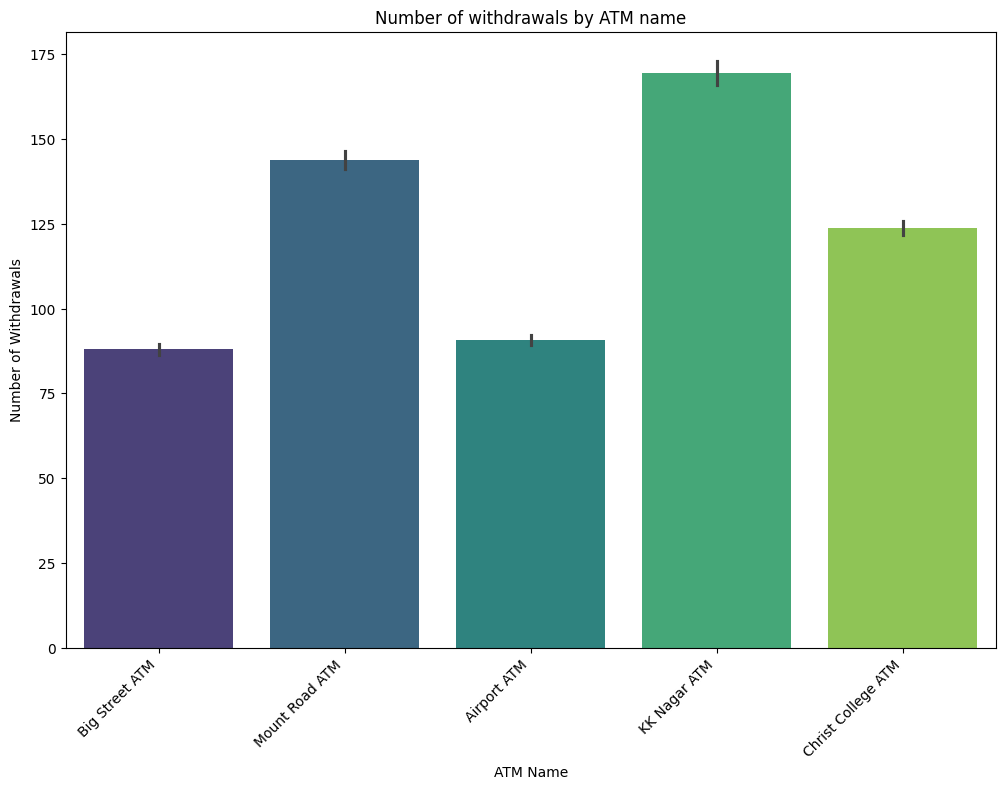

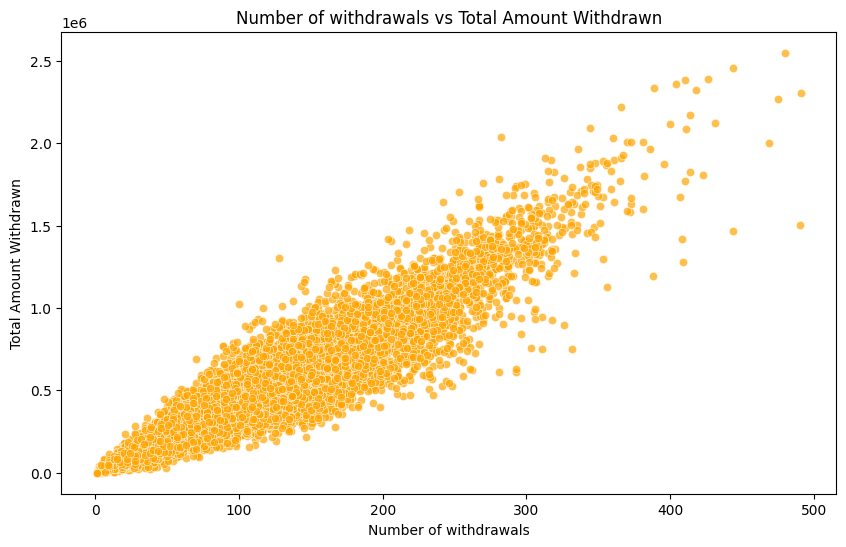

In [73]:
#Histogram of total amount withdrawn

plt.figure(figsize = (10,6))
sns.histplot(df['total_amount_withdrawn'],bins = 20,kde = True, color='skyblue')
plt.title('Histogram of Total Amount Withdrawn')
plt.xlabel('Total Amount Withdrawn')
plt.ylabel('Frequency')
plt.show()

#Bar plot of withdrawals by ATM name

plt.figure(figsize = (12,8))
sns.barplot(x='atm_name',y = 'No_Of_Withdrawals',data = df,palette = 'viridis')
plt.title('Number of withdrawals by ATM name')
plt.xlabel('ATM Name')
plt.ylabel('Number of Withdrawals')
plt.xticks(rotation = 45,ha='right')
plt.show()

#Scatter plot of total amount withdrawn vs number of withdrawals
plt.figure(figsize = (10,6))
sns.scatterplot(x='No_Of_Withdrawals',y = 'total_amount_withdrawn',data = df,color = 'orange',alpha =0.7)
plt.title('Number of withdrawals vs Total Amount Withdrawn')
plt.xlabel('Number of withdrawals')
plt.ylabel('Total Amount Withdrawn')
plt.show()


In [74]:
#Checking missing values

missing_values=df.isnull().sum()
print('missing Values:\n',missing_values)

missing Values:
 atm_name                        0
transaction_date                0
No_Of_Withdrawals               0
no_of_cub_card_withdrawals      0
no_of_other_card_withdrawals    0
total_amount_withdrawn          0
amount_withdrawn_cub_card       0
amount_withdrawn_other_card     0
weekday                         0
working_day                     0
dtype: int64


In [75]:
#Check duplicates

duplicated_rows = df[df.duplicated()]
print('Duplicated Rows:\n',duplicated_rows)

#Removing Duplicates

df.drop_duplicates(inplace=True)

Duplicated Rows:
 Empty DataFrame
Columns: [atm_name, transaction_date, No_Of_Withdrawals, no_of_cub_card_withdrawals, no_of_other_card_withdrawals, total_amount_withdrawn, amount_withdrawn_cub_card, amount_withdrawn_other_card, weekday, working_day]
Index: []


In [76]:
#Standardize column names
df.columns = df.columns.str.lower() #Convert column names to lower case

In [77]:
#Check data types
print('Data Types:\n',df.dtypes)

Data Types:
 atm_name                        object
transaction_date                object
no_of_withdrawals                int64
no_of_cub_card_withdrawals       int64
no_of_other_card_withdrawals     int64
total_amount_withdrawn           int64
amount_withdrawn_cub_card        int64
amount_withdrawn_other_card      int64
weekday                         object
working_day                     object
dtype: object


In [78]:
#Convert 'transaction_date' to datetime format

df['transaction_date']=pd.to_datetime(df['transaction_date'],format='mixed')

In [79]:
df['transaction_date'].dtypes

dtype('<M8[ns]')

In [80]:
df.columns

Index(['atm_name', 'transaction_date', 'no_of_withdrawals',
       'no_of_cub_card_withdrawals', 'no_of_other_card_withdrawals',
       'total_amount_withdrawn', 'amount_withdrawn_cub_card',
       'amount_withdrawn_other_card', 'weekday', 'working_day'],
      dtype='object')

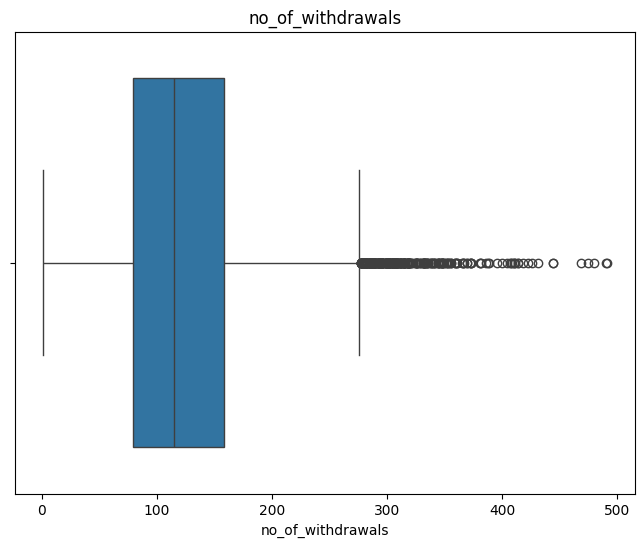

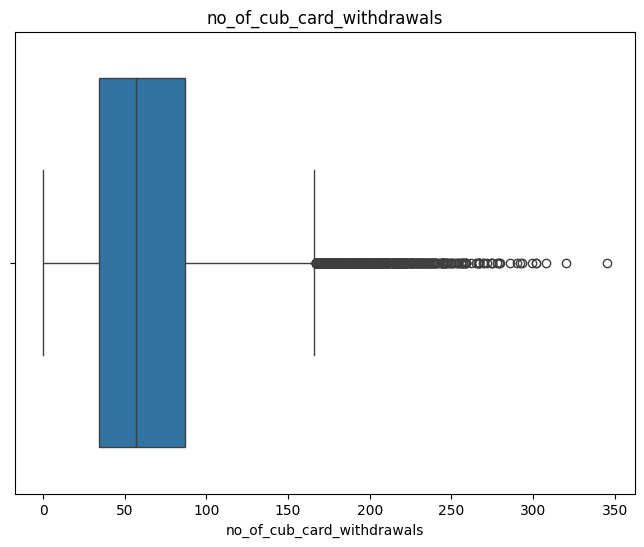

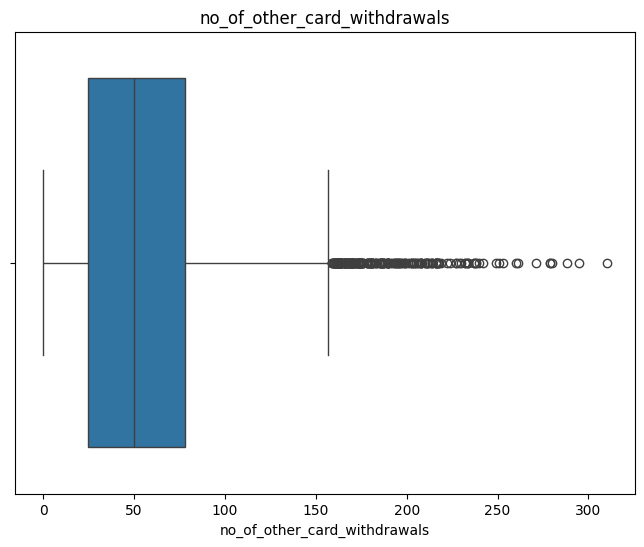

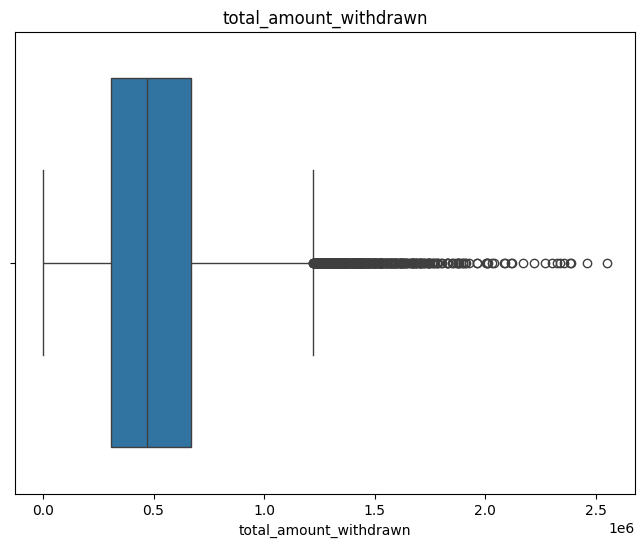

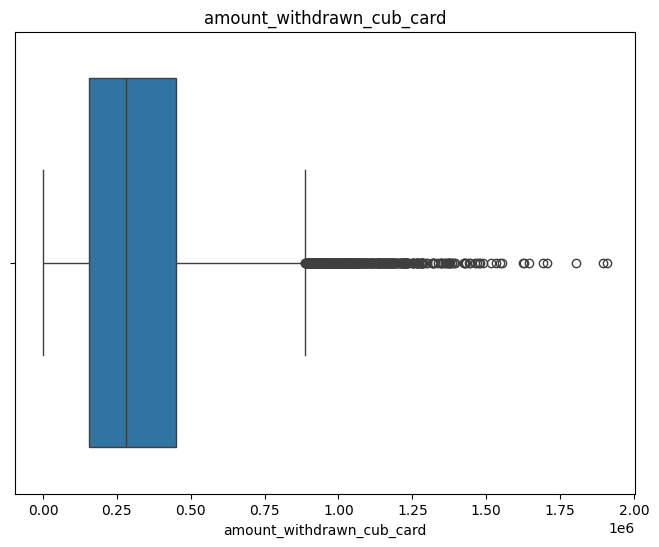

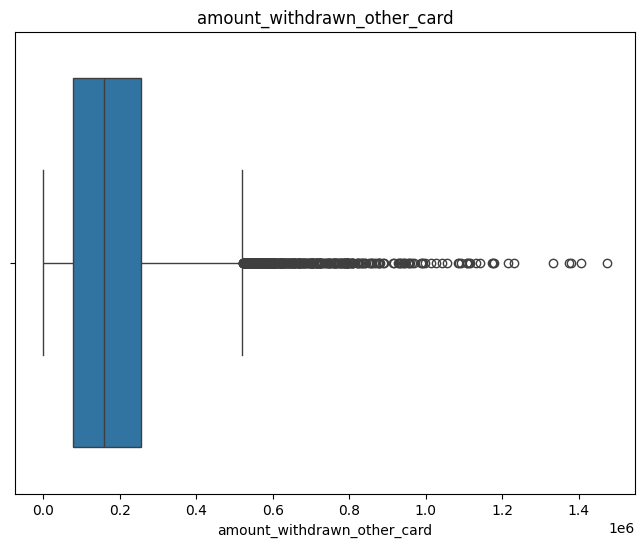

In [81]:
#check for outliers in numerical columns
numerical_cols = df.select_dtypes(include = ['int64','float64']).columns
for col in numerical_cols:
    #Use box plot to visualize outliers
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [82]:
#Check unique values of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print ('unique values in',col,':',df[col].unique())

unique values in atm_name : ['Big Street ATM' 'Mount Road ATM' 'Airport ATM' 'KK Nagar ATM'
 'Christ College ATM']
unique values in weekday : ['saturday' 'sunday' 'monday' 'tuesday' 'wednesday' 'thursday' 'friday']
unique values in working_day : ['H' 'W']


Descriptive Analysis

Summary statistics:
                     transaction_date  no_of_withdrawals  \
count                          11589       11589.000000   
mean   2014-03-31 03:44:24.354128896         123.341099   
min              2011-01-01 00:00:00           1.000000   
25%              2012-08-03 00:00:00          79.000000   
50%              2014-03-19 00:00:00         115.000000   
75%              2015-10-27 00:00:00         158.000000   
max              2017-12-09 00:00:00         491.000000   
std                              NaN          67.315288   

       no_of_cub_card_withdrawals  no_of_other_card_withdrawals  \
count                11589.000000                  11589.000000   
mean                    67.567694                     55.773406   
min                      0.000000                      0.000000   
25%                     34.000000                     25.000000   
50%                     57.000000                     50.000000   
75%                     87.000000            

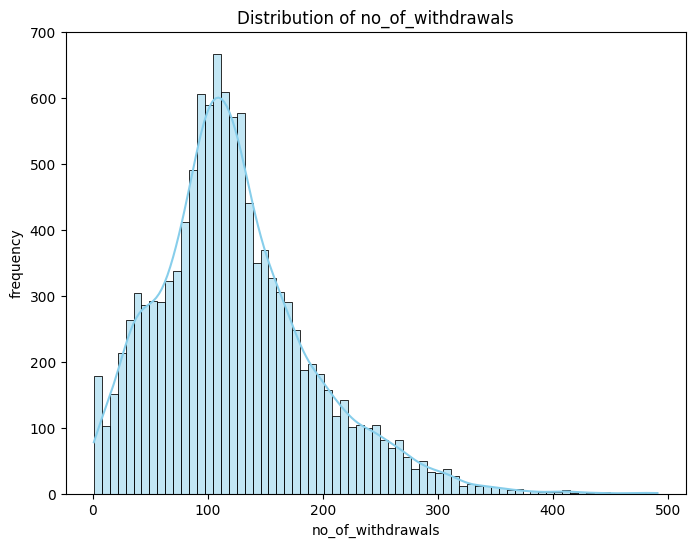

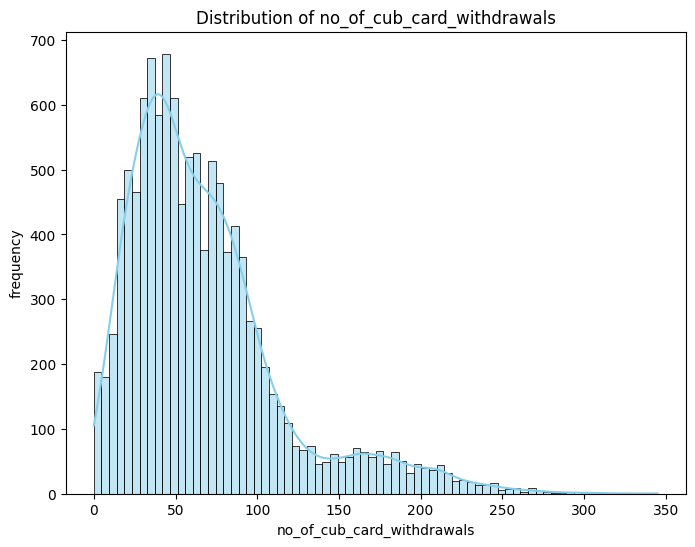

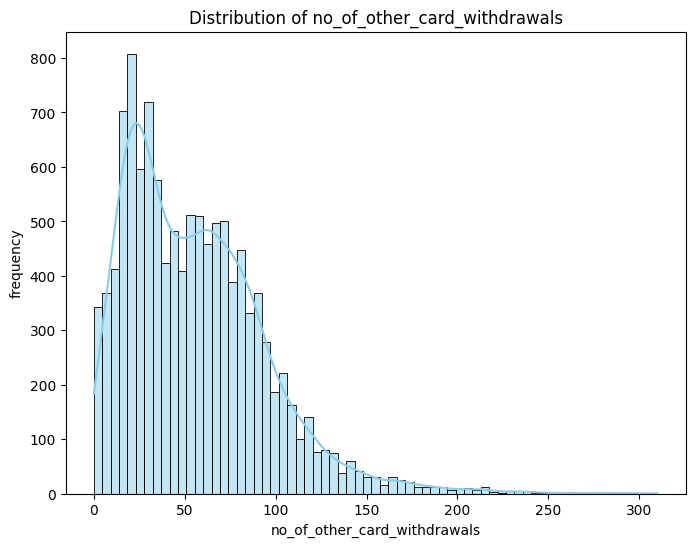

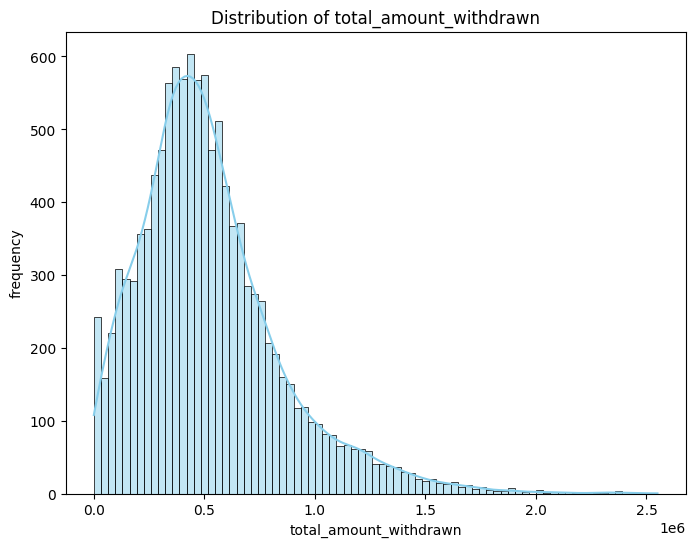

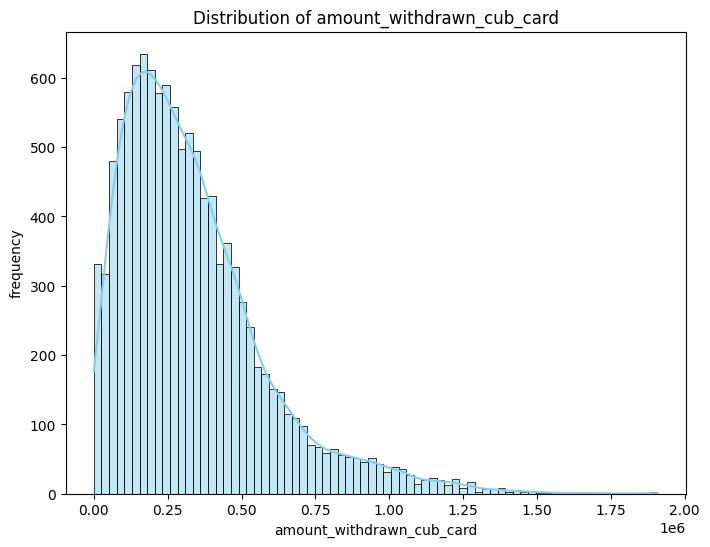

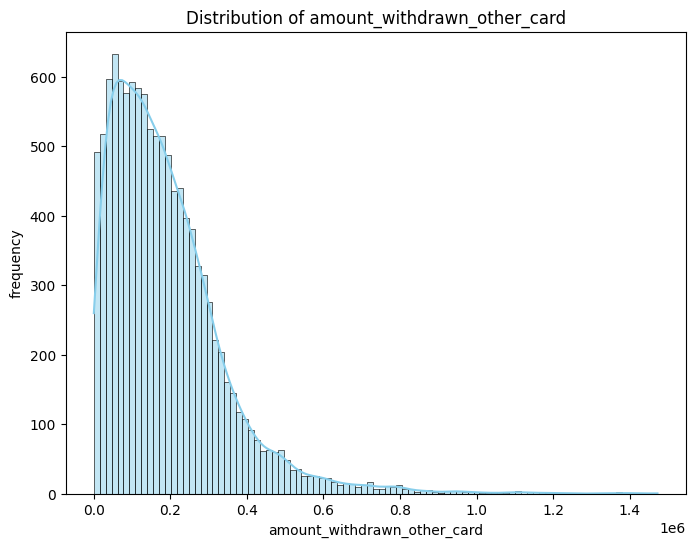

In [83]:
#Summary statistics
summary_stats = df.describe()
print('Summary statistics:\n',summary_stats)

#Data distribution (histograms and density plots)
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col],kde=True,color = 'skyblue')
    plt.title('Distribution of '+ col)
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

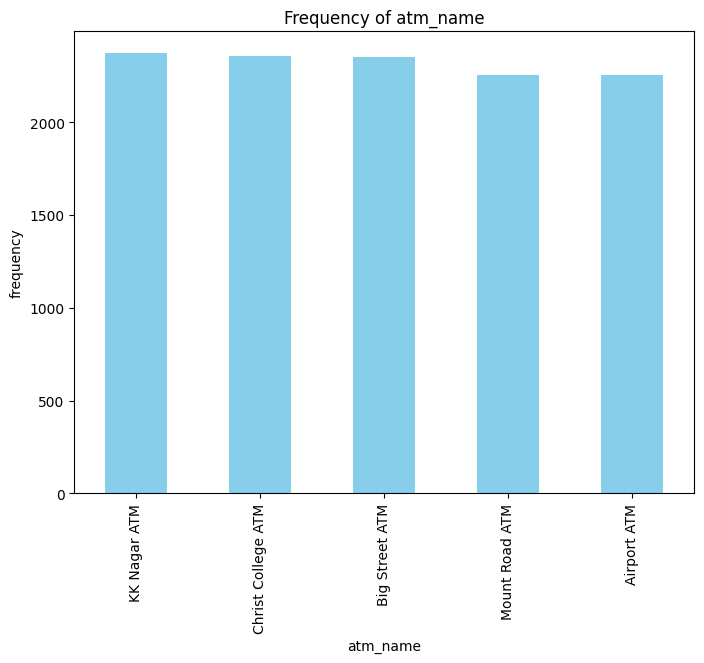

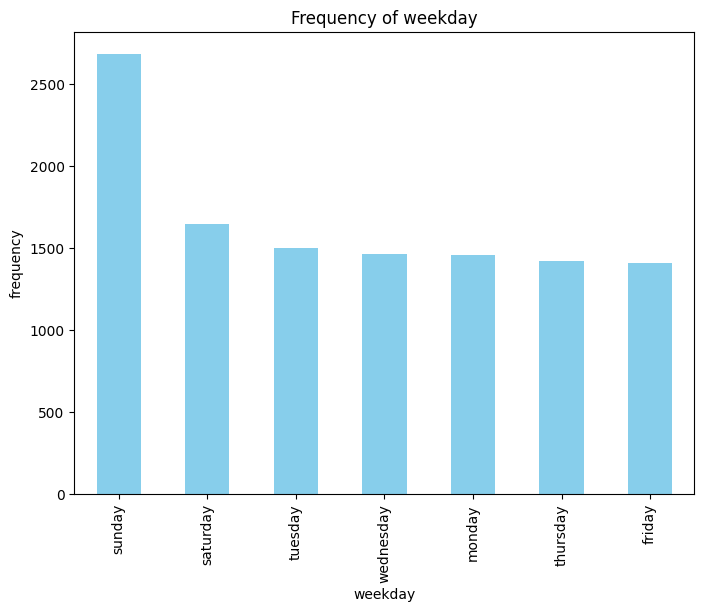

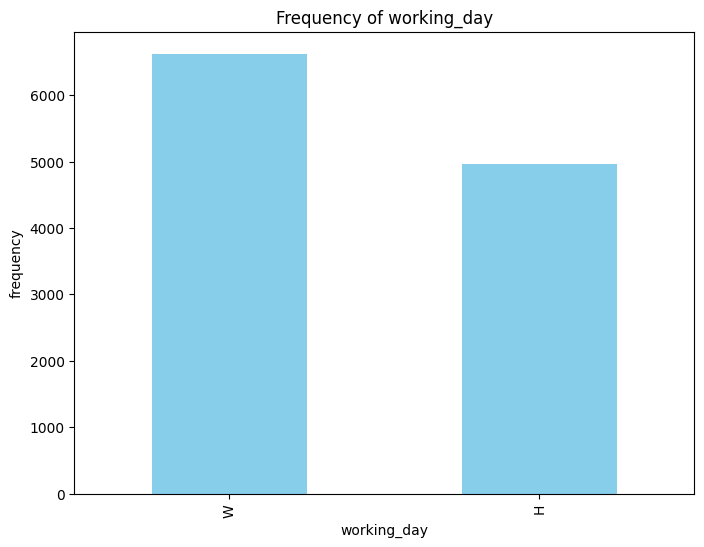

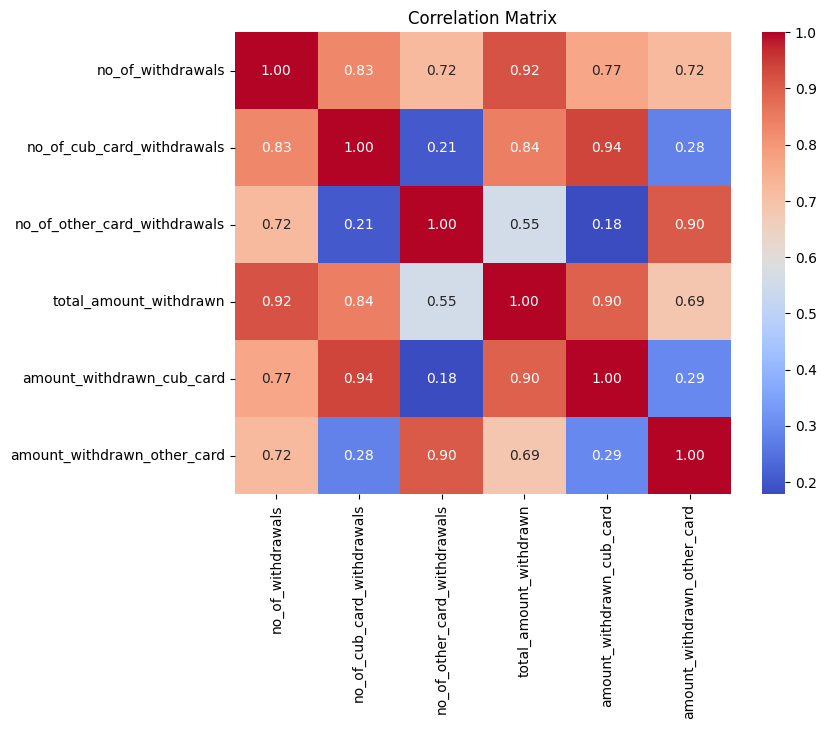

In [84]:
#Categorical analysis
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    df[col].value_counts().plot(kind='bar',color='skyblue')
    plt.title('Frequency of '+ col)
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

#corelation analysis
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

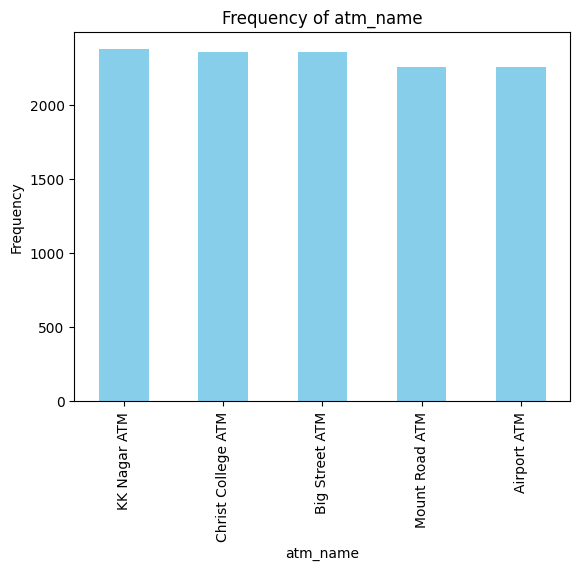

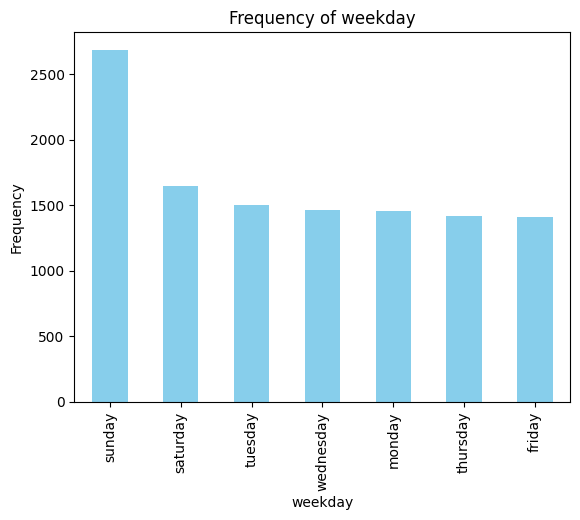

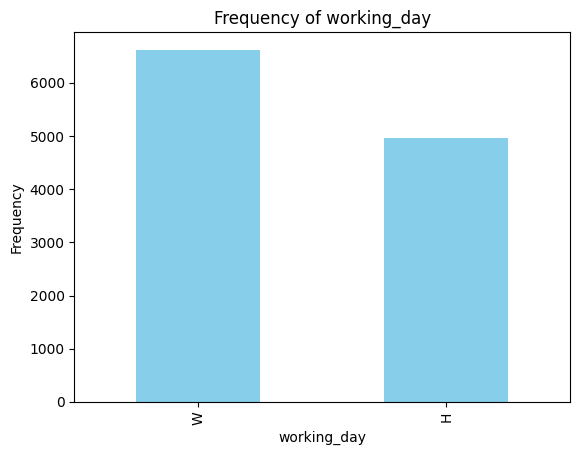

In [85]:
# Bar plots for categorical variables
categorical_col = df.select_dtypes(include=['object']).columns
for col in categorical_col:
    df[col].value_counts().plot(kind='bar',color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Frequency of ' + col)
    plt.show()

In [86]:
correlation_matrix

,no_of_withdrawals,no_of_cub_card_withdrawals,no_of_other_card_withdrawals,total_amount_withdrawn,amount_withdrawn_cub_card,amount_withdrawn_other_card
no_of_withdrawals,1.000000,0.828651,0.718444,0.916664,0.767584,0.719508
no_of_cub_card_withdrawals,0.828651,1.000000,0.205975,0.843602,0.936311,0.284056
no_of_other_card_withdrawals,0.718444,0.205975,1.000000,0.554181,0.178363,0.904834
total_amount_withdrawn,0.916664,0.843602,0.554181,1.000000,0.897033,0.686792
amount_withdrawn_cub_card,0.767584,0.936311,0.178363,0.897033,1.000000,0.294833
amount_withdrawn_other_card,0.719508,0.284056,0.904834,0.686792,0.294833,1.000000


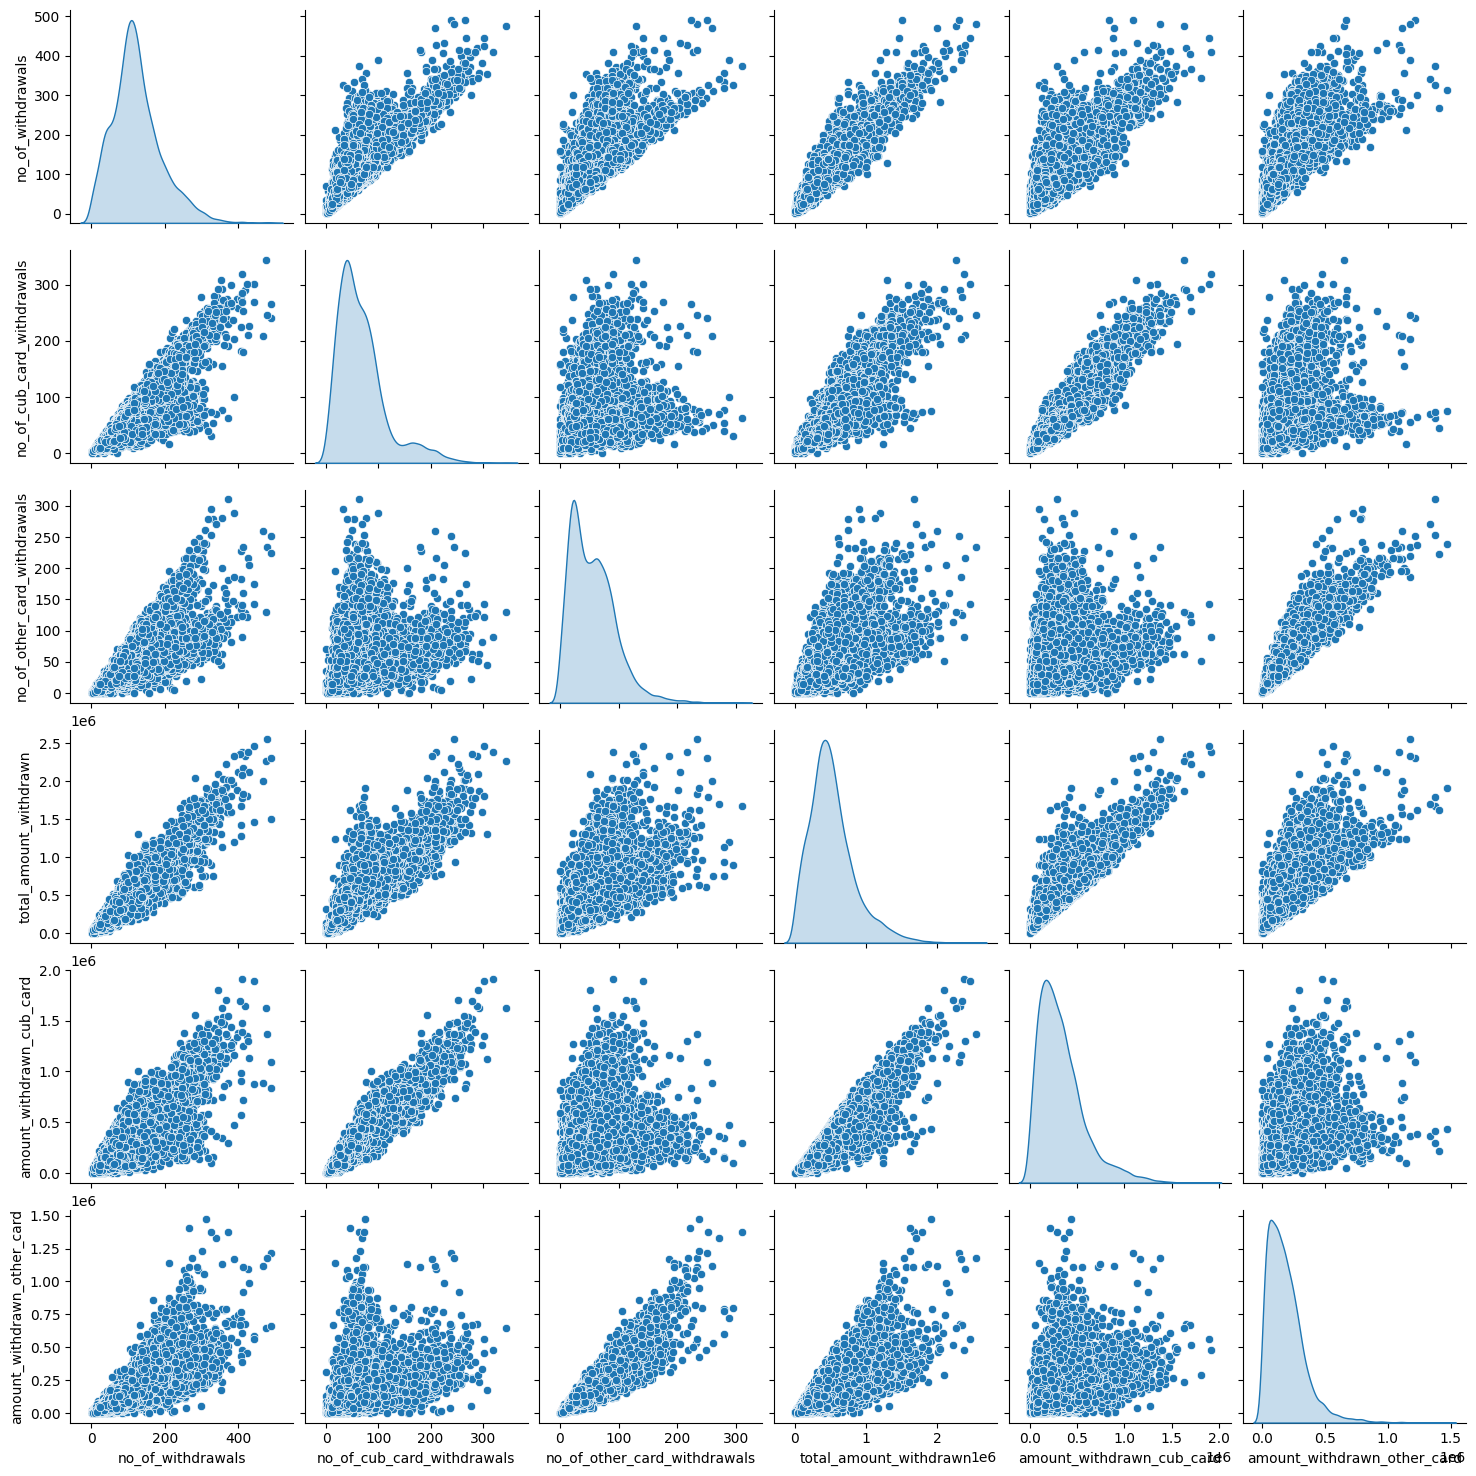

In [87]:
#Scatter plots for relationsships between numerical variable
sns.pairplot(df[numerical_cols],diag_kind='kde')
plt.show()

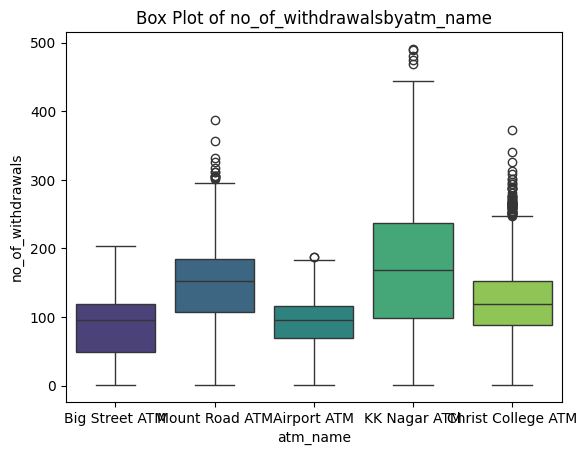

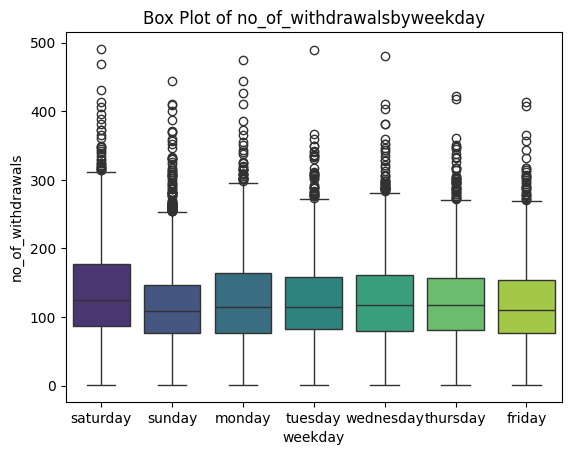

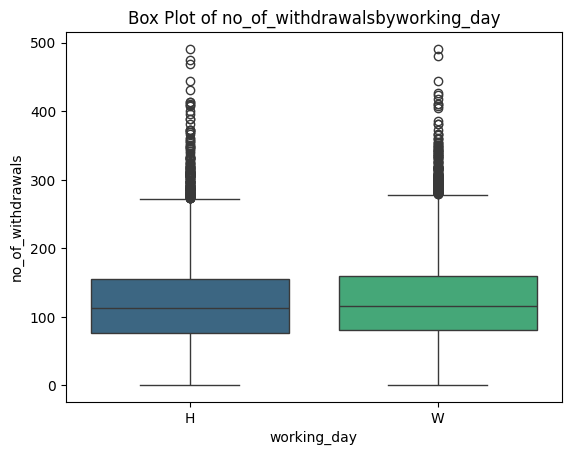

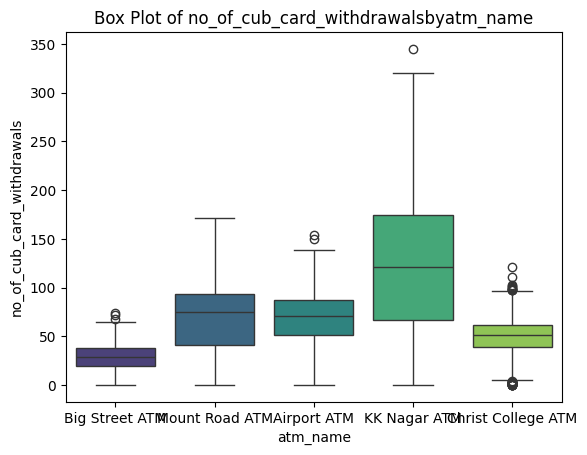

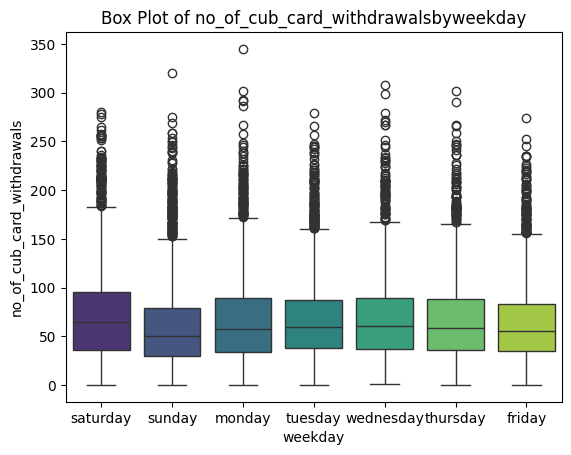

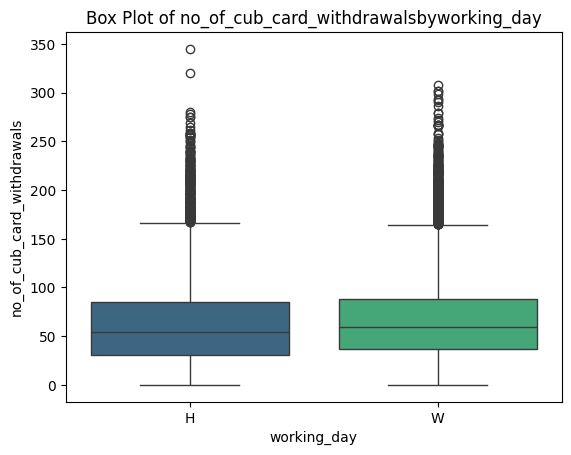

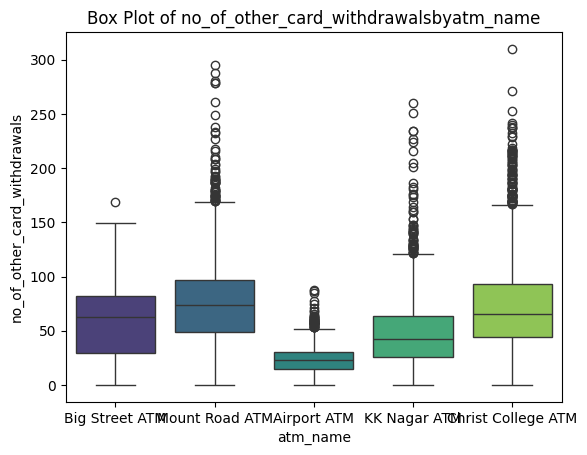

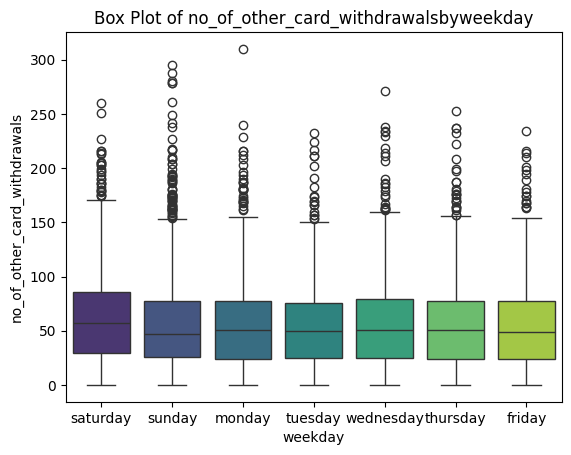

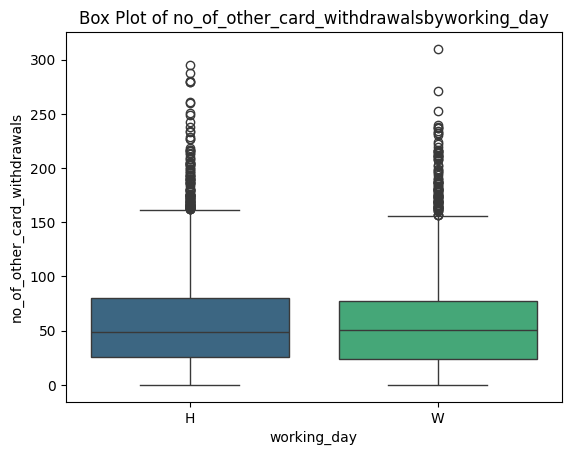

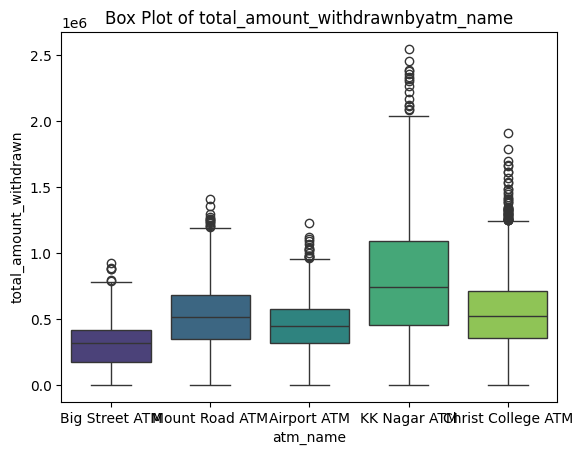

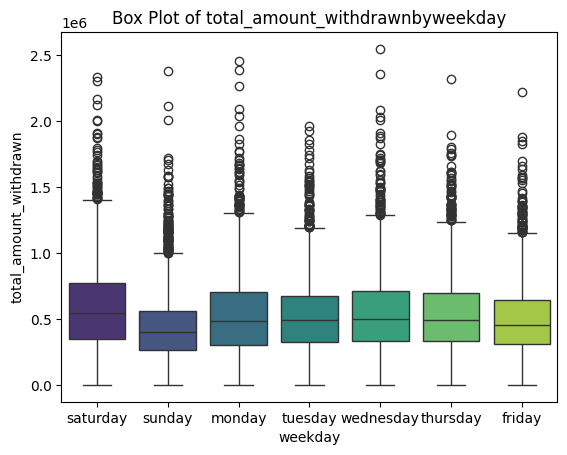

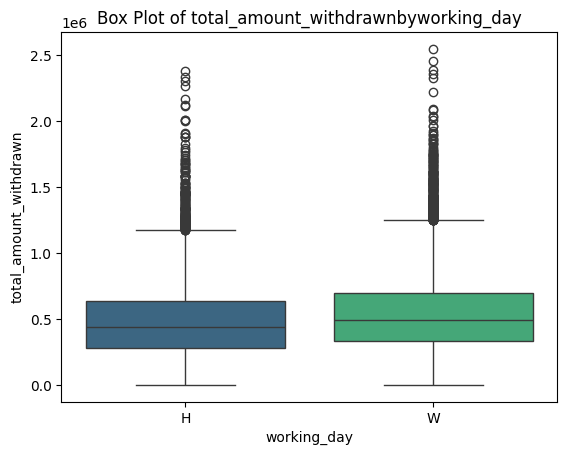

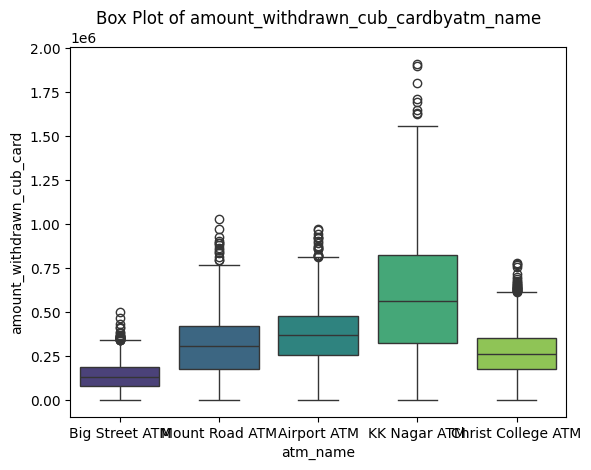

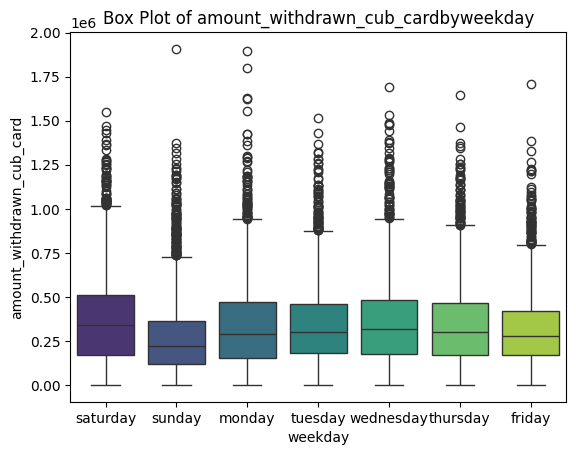

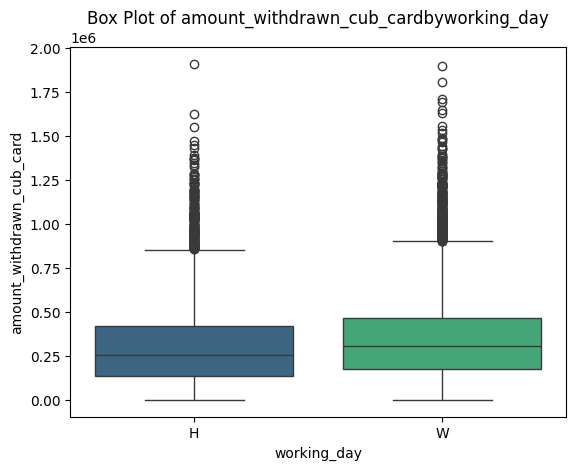

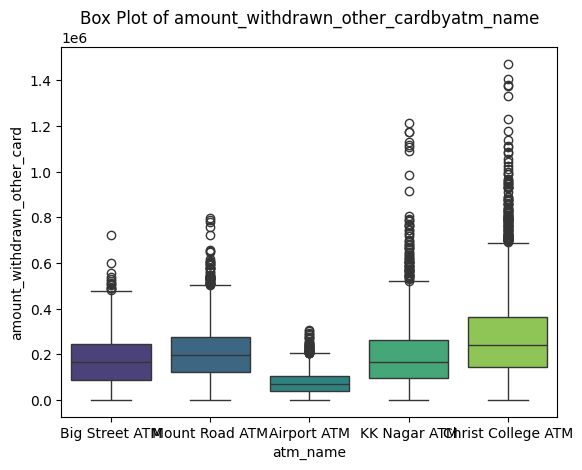

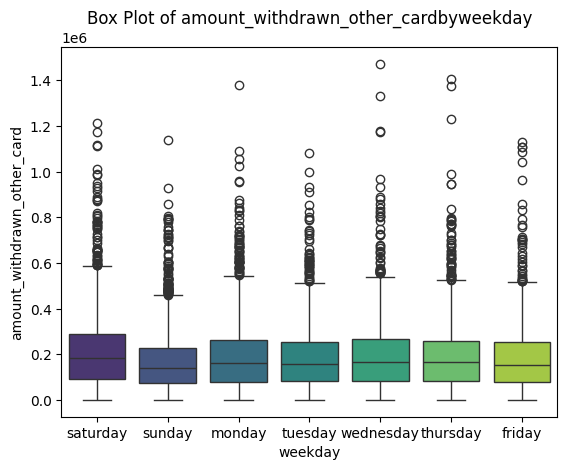

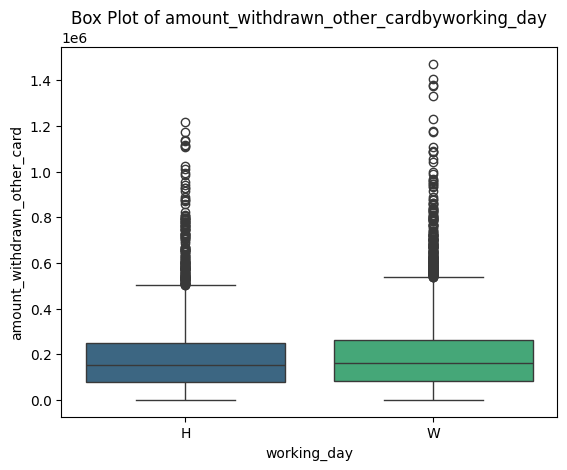

In [88]:
#Box plots for relationships between numerical and categorical variables

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        sns.boxplot(x = cat_col, y =num_col, data=df,palette='viridis')
        plt.title('Box Plot of ' + num_col + 'by' + cat_col)
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()

Feature Engineering

In [94]:
#Create a new feature representing the total number of card withdrawals
df['total_card_withdrawals']=df['no_of_cub_card_withdrawals'] + df['no_of_other_card_withdrawals']

# Display the first few rows to verify the new feature
print(df.head())

             atm_name  no_of_withdrawals  no_of_cub_card_withdrawals  \
0      Big Street ATM                 50                          20   
1      Mount Road ATM                253                          67   
2         Airport ATM                 98                          56   
3        KK Nagar ATM                265                         159   
4  Christ College ATM                 74                          25   

   no_of_other_card_withdrawals  total_amount_withdrawn  \
0                            30                  123800   
1                           186                  767900   
2                            42                  503400   
3                           106                  945300   
4                            49                  287700   

   amount_withdrawn_cub_card  amount_withdrawn_other_card  \
0                      41700                        82100   
1                     270900                       497000   
2                     347700 

In [90]:
categorical_cols =['weekday','working_day']
df=pd.get_dummies(df,columns=categorical_cols,drop_first = True)

print(df.head(2))

         atm_name transaction_date  no_of_withdrawals  \
0  Big Street ATM       2011-01-01                 50   
1  Mount Road ATM       2011-01-01                253   

   no_of_cub_card_withdrawals  no_of_other_card_withdrawals  \
0                          20                            30   
1                          67                           186   

   total_amount_withdrawn  amount_withdrawn_cub_card  \
0                  123800                      41700   
1                  767900                     270900   

   amount_withdrawn_other_card  total_card_withdrawals  weekday_monday  \
0                        82100                      50           False   
1                       497000                     253           False   

   weekday_saturday  weekday_sunday  weekday_thursday  weekday_tuesday  \
0              True           False             False            False   
1              True           False             False            False   

   weekday_wednesday  w

In [91]:
df.columns

Index(['atm_name', 'transaction_date', 'no_of_withdrawals',
       'no_of_cub_card_withdrawals', 'no_of_other_card_withdrawals',
       'total_amount_withdrawn', 'amount_withdrawn_cub_card',
       'amount_withdrawn_other_card', 'total_card_withdrawals',
       'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'working_day_W'],
      dtype='object')

In [92]:
#One hot encoding
categorical_cols =['weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'working_day_W']
df=pd.get_dummies(df,columns=categorical_cols,drop_first = True)

print(df.head(2))

         atm_name transaction_date  no_of_withdrawals  \
0  Big Street ATM       2011-01-01                 50   
1  Mount Road ATM       2011-01-01                253   

   no_of_cub_card_withdrawals  no_of_other_card_withdrawals  \
0                          20                            30   
1                          67                           186   

   total_amount_withdrawn  amount_withdrawn_cub_card  \
0                  123800                      41700   
1                  767900                     270900   

   amount_withdrawn_other_card  total_card_withdrawals  weekday_monday_True  \
0                        82100                      50                False   
1                       497000                     253                False   

   weekday_saturday_True  weekday_sunday_True  weekday_thursday_True  \
0                   True                False                  False   
1                   True                False                  False   

   weekday_tue

In [93]:
#Extract month and day from the 'transactio_data' column
df['transaction_month']=pd.to_datetime(df['transaction_date']).dt.month
df['transaction_day']=pd.to_datetime(df['transaction_date']).dt.day

#drop the original 'transaction_date' column
df.drop('transaction_date',axis=1,inplace=True)

#Display the first 2 rows to verify the extraction
print(df.head(2))

         atm_name  no_of_withdrawals  no_of_cub_card_withdrawals  \
0  Big Street ATM                 50                          20   
1  Mount Road ATM                253                          67   

   no_of_other_card_withdrawals  total_amount_withdrawn  \
0                            30                  123800   
1                           186                  767900   

   amount_withdrawn_cub_card  amount_withdrawn_other_card  \
0                      41700                        82100   
1                     270900                       497000   

   total_card_withdrawals  weekday_monday_True  weekday_saturday_True  \
0                      50                False                   True   
1                     253                False                   True   

   weekday_sunday_True  weekday_thursday_True  weekday_tuesday_True  \
0                False                  False                 False   
1                False                  False                 False   
